In [1]:
import torch
from mmagic.models.basicsr_utils.vidt_proc import window_partition

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/D3D/build.ninja...
Building extension module D3D...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module D3D...


In [7]:
D = 6
H = 64
W = 64
device = 'cuda'
window_size = [2, 4, 4]
shift_size = [3, 8, 8]

In [8]:

img_mask = torch.zeros((1, D, H, W, 1), device=device)  # 1 Dp Hp Wp 1
cnt = 0
for d in slice(-window_size[0]), slice(-window_size[0], -shift_size[0]), slice(-shift_size[0], None):
    for h in slice(-window_size[1]), slice(-window_size[1], -shift_size[1]), slice(-shift_size[1], None):
        for w in slice(-window_size[2]), slice(-window_size[2], -shift_size[2]), slice(-shift_size[2], None):
            img_mask[:, d, h, w, :] = cnt
            cnt += 1

In [9]:
# out shape: nW, ws[0]*ws[1]*ws[2], 1
mask_windows = window_partition(img_mask, window_size)
# nW, ws[0]*ws[1]*ws[2]
mask_windows = mask_windows.squeeze(-1)  

In [11]:
attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))

In [12]:
attn_mask.shape

torch.Size([768, 32, 32])

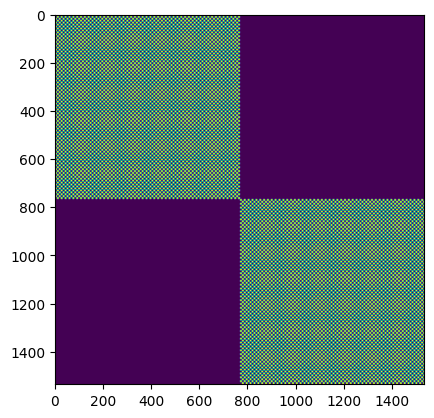

In [52]:
# Visualization

import matplotlib.pyplot as plt

plt.imshow(attn_mask[7, :, :].detach().cpu())
plt.show()